In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from pygam import LogisticGAM, s
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from pygam import LogisticGAM, s
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss


df = pd.read_excel('5-Pumpkin_Seeds_Dataset.xlsx')


X = df[['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length','Convex_Area']].to_numpy()
y = df['Class'].to_numpy()

le = LabelEncoder()
y = le.fit_transform(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [3]:
p = X_train.shape[1]
terms = s(0, n_splines=10)
for i in range(1, p):
    terms = terms + s(i, n_splines=10)

gam = LogisticGAM(terms)

In [ ]:
# baseline 统一λ ，网格搜索
lam = np.logspace(-3, 3, 11)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
best_auc, best_model, best_lam = -1, None, None

aucs = []
for tr, va in skf.split(X_train, y_train):
    model= gam.gridsearch(X_train[tr], y_train[tr], lam=lam) 
    prediction = model.predict_proba(X[va])
    aucs.append(roc_auc_score(y[va], prediction))
    
m = np.mean(aucs)
best_auc, best_lam = m, getattr(model, 'lam_', getattr(model, 'lam', None))
best_model = model
 


In [8]:
print("Best AUC (scalar λ):", best_auc )

Best AUC (scalar λ): 0.957696474287524


In [7]:
best_model.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     17.7644
Link Function:                        LogitLink Log Likelihood:                                  -472.8997
Number of Samples:                         1800 AIC:                                              981.3282
                                                AICc:                                             981.7449
                                                UBRE:                                               2.5531
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.6205
Feature Function                  Lam

C:\Users\PC\AppData\Local\Temp\ipykernel_25168\1264976019.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  best_model.summary()


In [6]:
best_lam

[[np.float64(0.25118864315095796)],
 [np.float64(0.25118864315095796)],
 [np.float64(0.25118864315095796)],
 [np.float64(0.25118864315095796)],
 [np.float64(0.25118864315095796)]]

In [9]:
print("Best AUC (scalar λ):", best_auc )

Best AUC (scalar λ): 0.9571187934896151


In [32]:
best_model.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     17.6077
Link Function:                        LogitLink Log Likelihood:                                  -473.3251
Number of Samples:                         1800 AIC:                                              981.8654
                                                AICc:                                             982.2753
                                                UBRE:                                               2.5533
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.6202
Feature Function                  Lam

C:\Users\PC\AppData\Local\Temp\ipykernel_24856\1264976019.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  best_model.summary()


In [47]:
# 交互项
from pygam import te

terms_inter = terms + te(2, 3, n_splines=10)
gam_inter = LogisticGAM(terms_inter)

# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# best_auc, best_model, best_lam = -1, None, None
best_auc_inter = -1

aucs = []
for tr, va in skf.split(X_train, y_train):
    model_inter= gam_inter.gridsearch(X_train[tr], y_train[tr], lam=lam) 
    prediction_inter = model_inter.predict_proba(X[va])
    aucs.append(roc_auc_score(y[va], prediction_inter))
m = np.mean(aucs)

best_auc_inter, best_lam_inter = m, lam
best_model_inter = model_inter
        

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--D:\voice_extraction\voice_emotion_recognition\.venv\Lib\site-packages\pygam\links.py:148: RuntimeWarning: divide by zero encountered in divide
  return dist.levels / (mu * (dist.levels - mu))
D:\voice_extraction\voice_emotion_recognition\.venv\Lib\site-packages\pygam\pygam.py:630: RuntimeWarning: invalid value encountered in multiply
  self.link.gradient(mu, self.distribution) ** 2
  9% (1 of 11) |##                       | Elapsed Time: 0:00:01 ETA:   0:00:18D:\voice_extraction\voice_emotion_recognition\.venv\Lib\site-packages\pygam\links.py:148: RuntimeWarning: divide by zero encountered in divide
  return dist.levels / (mu * (dist.levels - mu))
D:\voice_extraction\voice_emotion_recognition\.venv\Lib\site-packages\pygam\pygam.py:630: RuntimeWarning: invalid value encountered in multiply
  self.link.gradient(mu, self.distribution) ** 2
 18% (2 of 11) |####                     | Elapsed Time: 0:00:03 ETA:   

did not converge


D:\voice_extraction\voice_emotion_recognition\.venv\Lib\site-packages\pygam\links.py:148: RuntimeWarning: overflow encountered in divide
  return dist.levels / (mu * (dist.levels - mu))
100% (11 of 11) |########################| Elapsed Time: 0:00:22 Time:  0:00:220:02
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--D:\voice_extraction\voice_emotion_recognition\.venv\Lib\site-packages\pygam\links.py:148: RuntimeWarning: divide by zero encountered in divide
  return dist.levels / (mu * (dist.levels - mu))
D:\voice_extraction\voice_emotion_recognition\.venv\Lib\site-packages\pygam\pygam.py:630: RuntimeWarning: invalid value encountered in multiply
  self.link.gradient(mu, self.distribution) ** 2
D:\voice_extraction\voice_emotion_recognition\.venv\Lib\site-packages\pygam\pygam.py:630: RuntimeWarning: overflow encountered in square
  self.link.gradient(mu, self.distribution) ** 2
D:\voice_extraction\voice_emotion_recognition\.venv\Lib\site-packages\pygam\link

In [10]:
print("Best AUC (scalar λ):", best_auc_inter )

Best AUC (scalar λ): 0.957755700459996


In [11]:
best_model_inter.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     18.9667
Link Function:                        LogitLink Log Likelihood:                                     -471.8
Number of Samples:                         1800 AIC:                                              981.5335
                                                AICc:                                             982.0041
                                                UBRE:                                               2.5537
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.6214
Feature Function                  Lam

C:\Users\PC\AppData\Local\Temp\ipykernel_25168\3258436923.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  best_model_inter.summary()


# 调整n_splines

In [46]:
#fixed n_splines
terms = s(0, n_splines=10)
for i in range(1, 5):
    terms = terms + s(i, n_splines=10)

gam = LogisticGAM(terms)

In [42]:
# unfixed n_splines
terms = s(0,16)+ s(1,10) + s(2,10)+ s(3,10)+ s(4,6)

# gam = LogisticGAM(terms)

In [ ]:
# 加权lamda
# 对应特征顺序：['Area','Perimeter','Major_Axis_Length','Minor_Axis_Length','Convex_Area']
lam = np.logspace(-2, 2, 5)
lam_grid = [
    1 * lam, 
    1.2 * lam, 
    1.8 * lam, 
    1.8 * lam, 
    3 * lam  
]

best_auc_weight = -1

aucs = []
for tr, va in skf.split(X_train, y_train):
    model_weight= gam.gridsearch(X_train[tr], y_train[tr], lam=lam_grid) 
    prediction_weight = model_weight.predict_proba(X[va])
    aucs.append(roc_auc_score(y[va], prediction_weight))
m = np.mean(aucs)

best_auc_weight, best_lam_weight = m, lam
best_model_weight = model
        
print("Best AUC (weighted λ):", best_auc_weight )

In [26]:
best_lam_weight = m, getattr(best_model_weight, 'lam_', getattr(best_model_weight, 'lam', None))
print(best_lam_weight)

(np.float64(0.957406929250921), [[np.float64(0.01)], [np.float64(120.0)], [np.float64(0.18000000000000002)], [np.float64(0.18000000000000002)], [np.float64(300.0)]])


In [25]:
best_model_weight.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     18.8614
Link Function:                        LogitLink Log Likelihood:                                   -470.006
Number of Samples:                         1800 AIC:                                              977.7348
                                                AICc:                                             978.2006
                                                UBRE:                                               2.5516
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.6229
Feature Function                  Lam

C:\Users\PC\AppData\Local\Temp\ipykernel_25168\252330310.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  best_model_weight.summary()


In [27]:
# 单一lamda + unfixed n_splines
lam = np.logspace(-2, 2, 5)

best_auc_nsp = -1 

aucs = []
for tr, va in skf.split(X_train, y_train):
    model_nsp= gam.gridsearch(X_train[tr], y_train[tr], lam=lam) 
    prediction_nsp = model_nsp.predict_proba(X[va])
    aucs.append(roc_auc_score(y[va], prediction_nsp))
m = np.mean(aucs)

best_auc_nsp, best_lam = m, lam
best_model_nsp = model_nsp

100% (5 of 5) |##########################| Elapsed Time: 0:00:02 Time:  0:00:020:00
100% (5 of 5) |##########################| Elapsed Time: 0:00:02 Time:  0:00:020:00
  0% (0 of 5) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--D:\voice_extraction\voice_emotion_recognition\.venv\Lib\site-packages\pygam\links.py:148: RuntimeWarning: divide by zero encountered in divide
  return dist.levels / (mu * (dist.levels - mu))
D:\voice_extraction\voice_emotion_recognition\.venv\Lib\site-packages\pygam\pygam.py:630: RuntimeWarning: invalid value encountered in multiply
  self.link.gradient(mu, self.distribution) ** 2
 20% (1 of 5) |#####                     | Elapsed Time: 0:00:00 ETA:   0:00:01D:\voice_extraction\voice_emotion_recognition\.venv\Lib\site-packages\pygam\links.py:148: RuntimeWarning: divide by zero encountered in divide
  return dist.levels / (mu * (dist.levels - mu))
D:\voice_extraction\voice_emotion_recognition\.venv\Lib\site-packages\pygam\pygam.py:630: Runtime

In [28]:
print(best_auc_nsp)

0.9581383922308966


In [29]:
# 单一lamda + unfixed n_splines + 交互项
from pygam import te
best_auc_inter_nsp = -1

terms_inter_nsp = terms + te(2, 3, n_splines=6)
gam_inter_nsp = LogisticGAM(terms_inter_nsp)

lam = np.logspace(-3, 3, 11)


aucs = []
for tr, va in skf.split(X_train, y_train):
    model_inter_nsp= gam_inter_nsp.gridsearch(X_train[tr], y_train[tr], lam=lam) 
    prediction_inter_nsp = model_inter_nsp.predict_proba(X[va])
    aucs.append(roc_auc_score(y[va], prediction_inter_nsp))
m = np.mean(aucs)
best_auc_inter_nsp, best_lam_inter_nsp = m, lam
best_model_inter_nsp = model_inter_nsp

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--D:\voice_extraction\voice_emotion_recognition\.venv\Lib\site-packages\pygam\links.py:148: RuntimeWarning: divide by zero encountered in divide
  return dist.levels / (mu * (dist.levels - mu))
D:\voice_extraction\voice_emotion_recognition\.venv\Lib\site-packages\pygam\pygam.py:630: RuntimeWarning: invalid value encountered in multiply
  self.link.gradient(mu, self.distribution) ** 2
  9% (1 of 11) |##                       | Elapsed Time: 0:00:01 ETA:   0:00:18D:\voice_extraction\voice_emotion_recognition\.venv\Lib\site-packages\pygam\links.py:148: RuntimeWarning: divide by zero encountered in divide
  return dist.levels / (mu * (dist.levels - mu))
D:\voice_extraction\voice_emotion_recognition\.venv\Lib\site-packages\pygam\pygam.py:630: RuntimeWarning: invalid value encountered in multiply
  self.link.gradient(mu, self.distribution) ** 2
 18% (2 of 11) |####                     | Elapsed Time: 0:00:02 ETA:   

did not converge


D:\voice_extraction\voice_emotion_recognition\.venv\Lib\site-packages\pygam\links.py:132: RuntimeWarning: overflow encountered in exp
  elp = np.exp(lp)
D:\voice_extraction\voice_emotion_recognition\.venv\Lib\site-packages\pygam\links.py:133: RuntimeWarning: invalid value encountered in divide
  return dist.levels * elp / (elp + 1)
D:\voice_extraction\voice_emotion_recognition\.venv\Lib\site-packages\pygam\links.py:148: RuntimeWarning: divide by zero encountered in divide
  return dist.levels / (mu * (dist.levels - mu))
D:\voice_extraction\voice_emotion_recognition\.venv\Lib\site-packages\pygam\links.py:148: RuntimeWarning: overflow encountered in divide
  return dist.levels / (mu * (dist.levels - mu))
D:\voice_extraction\voice_emotion_recognition\.venv\Lib\site-packages\pygam\pygam.py:630: RuntimeWarning: overflow encountered in square
  self.link.gradient(mu, self.distribution) ** 2
D:\voice_extraction\voice_emotion_recognition\.venv\Lib\site-packages\pygam\pygam.py:630: RuntimeWarni

In [30]:
print(best_auc_inter_nsp)

0.9577267031940544


In [35]:
# 加权lamda + unfixed n_splines
# 对应特征顺序：['Area','Perimeter','Major_Axis_Length','Minor_Axis_Length','Convex_Area']
best_lam = [0.96, 0.01, 120, 0.18, 300.0] 

best_auc_weight_nsp = -1

aucs = []
for tr, va in skf.split(X_train, y_train):
    model_weight_nsp= LogisticGAM(terms, lam=best_lam)
    model_weight_nsp.fit(X_train[tr], y_train[tr])
    prediction_weight_nsp = model_weight_nsp.predict_proba(X[va])
    aucs.append(roc_auc_score(y[va], prediction_weight_nsp))
m = np.mean(aucs)

best_auc_weight_nsp, best_lam_weight_nsp = m, lam
best_model_weight_nsp = model_weight_nsp
        
print("Best AUC (weighted λ):", best_auc_weight_nsp )

Best AUC (weighted λ): 0.9579279005116469


In [45]:
# 加权lamda+交互项
from pygam import te

best_lam = [0.96, 0.01, 120, 0.18, 300.0,1,1] 

terms_inter = terms + te(2, 3, n_splines=10)

# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# best_auc, best_model, best_lam = -1, None, None
best_auc_inter = -1

aucs = []
for tr, va in skf.split(X_train, y_train):
    model_inter_weight= LogisticGAM(terms_inter, lam=best_lam).fit(X_train[tr], y_train[tr])
    prediction_inter_weight = model_inter_weight.predict_proba(X[va])
    aucs.append(roc_auc_score(y[va], prediction_inter_weight))
m = np.mean(aucs)

best_auc_inter_weight = m      

In [44]:
# 加权lamda + unfixed n_splines + 交互项
best_auc_inter_nsp_weight = -1

terms_inter_nsp_weight = terms + te(2, 3, n_splines=6)
# gam_inter_nsp_weight = LogisticGAM(terms_inter_nsp)


best_lam = [0.96, 0.01, 120, 0.18, 300.0] 

aucs = []
for tr, va in skf.split(X_train, y_train):
    model_inter_nsp_weight= LogisticGAM(terms, lam=best_lam).fit(X_train[tr], y_train[tr])
    prediction_inter_nsp_weight = model_inter_nsp_weight.predict_proba(X[va])
    aucs.append(roc_auc_score(y[va], prediction_inter_nsp_weight))
m = np.mean(aucs)

best_auc_inter_nsp_weight = m
best_model_inter_nsp_weight = model_inter_nsp_weight

In [20]:
print(best_auc_inter_nsp_weight)

0.9577267031940544


In [ ]:
best_model_inter_nsp_weight.summary()

In [48]:
print("统一λ:", best_auc, "  best λ:", getattr(best_model, 'lam_', None))
print("统一λ + 交互:", best_auc_inter, "  best λ:", getattr(best_model_inter, 'lam_', None))
print("加权λ:", best_auc_weight, "  best λ vec:", getattr(best_model_weight, 'lam_', None))
print("统一λ + n_splines:", best_auc_nsp, "  best λ vec:", getattr(best_model_nsp, 'lam_', None))
print("统一λ + 交互 + n_splines:", best_auc_inter_nsp, "  best λ:", getattr(best_model_inter_nsp, 'lam_', None))
print("加权λ + n_splines:", best_auc_weight_nsp, "  best λ vec:", getattr(best_model_weight_nsp, 'lam_', None))
print("加权λ + 交互:", best_auc_inter_weight, "  best λ vec:", getattr(model_inter_weight, 'lam_', None))
print("加权λ + 交互 + n_splines:", best_auc_inter_nsp_weight, "  best λ vec:", getattr(best_model_inter_nsp_weight, 'lam_', None))

统一λ: 0.957696474287524   best λ: None
统一λ + 交互: 0.9573068166497272   best λ: None
加权λ: 0.957406929250921   best λ vec: None
统一λ + n_splines: 0.9581383922308966   best λ vec: None
统一λ + 交互 + n_splines: 0.9577267031940544   best λ: None
加权λ + n_splines: 0.9579279005116469   best λ vec: None
加权λ + 交互: 0.9583834450656035   best λ vec: None
加权λ + 交互 + n_splines: 0.9579279005116469   best λ vec: None


In [49]:
proba = best_model.predict_proba(X_test)
proba_inter = best_model_inter.predict_proba(X_test)
proba_weight = best_model_weight.predict_proba(X_test)
proba_nsp = best_model_nsp.predict_proba(X_test)
proba_inter_nsp = best_model_inter_nsp.predict_proba(X_test)
proba_wight_nsp = best_model_weight_nsp.predict_proba(X_test)
proba_weight_inter = model_inter_weight.predict_proba(X_test)
proba_weight_inter_nsp = best_model_inter_nsp_weight.predict_proba(X_test)


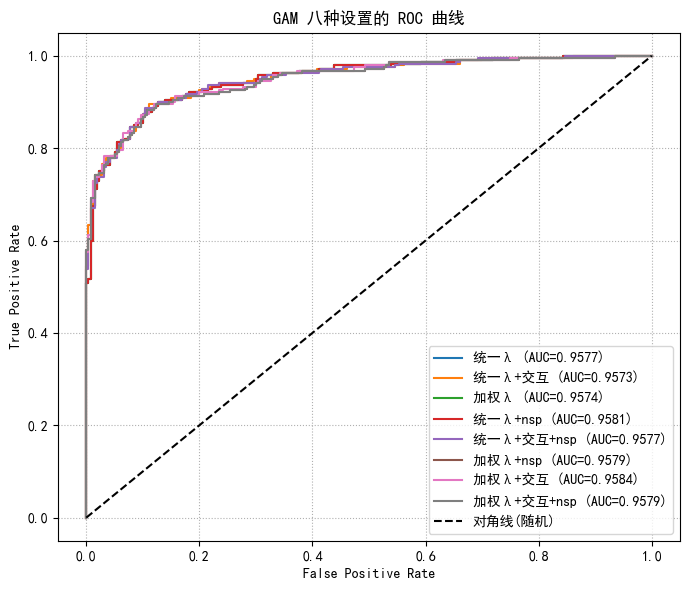

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr1, tpr1, _ = roc_curve(y_test, proba)
fpr2, tpr2, _ = roc_curve(y_test, proba_inter)
fpr3, tpr3, _ = roc_curve(y_test, proba_weight)
fpr4, tpr4, _ = roc_curve(y_test, proba_nsp)
fpr5, tpr5, _ = roc_curve(y_test, proba_inter_nsp)
fpr6, tpr6, _ = roc_curve(y_test, proba_wight_nsp)
fpr7, tpr7, _ = roc_curve(y_test, proba_weight_inter)
fpr8, tpr8, _ = roc_curve(y_test, proba_weight_inter_nsp)

plt.figure(figsize=(7, 6))
plt.plot(fpr1, tpr1, label=f'统一λ (AUC={best_auc:.4f})')
plt.plot(fpr2, tpr2, label=f'统一λ+交互 (AUC={best_auc_inter:.4f})')
plt.plot(fpr3, tpr3, label=f'加权λ (AUC={best_auc_weight:.4f})')
plt.plot(fpr4, tpr4, label=f'统一λ+nsp (AUC={best_auc_nsp:.4f})')
plt.plot(fpr5, tpr5, label=f'统一λ+交互+nsp (AUC={best_auc_inter_nsp:.4f})')
plt.plot(fpr6, tpr6, label=f'加权λ+nsp (AUC={best_auc_weight_nsp:.4f})')
plt.plot(fpr7, tpr7, label=f'加权λ+交互 (AUC={best_auc_inter_weight:.4f})')
plt.plot(fpr8, tpr8, label=f'加权λ+交互+nsp (AUC={best_auc_inter_nsp_weight:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='对角线(随机)')  # 对角线

plt.style.use('default')  # 使用默认白色背景
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用 SimHei 字体支持中文
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GAM 八种设置的 ROC 曲线')
plt.legend(loc='lower right')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

In [52]:
model_inter_weight.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     18.4501
Link Function:                        LogitLink Log Likelihood:                                  -500.5897
Number of Samples:                         1800 AIC:                                             1038.0796
                                                AICc:                                            1038.5267
                                                UBRE:                                               2.5849
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.5983
Feature Function                  Lam

C:\Users\PC\AppData\Local\Temp\ipykernel_25168\2706203343.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  model_inter_weight.summary()


In [58]:
model_inter_weight.statistics_.keys()

dict_keys(['n_samples', 'm_features', 'edof_per_coef', 'edof', 'scale', 'cov', 'se', 'AIC', 'AICc', 'pseudo_r2', 'GCV', 'UBRE', 'loglikelihood', 'deviance', 'p_values'])

In [59]:
# Check available fields in statistics_


print("=== GAM模型系数分析 ===")

# 1. 查看所有系数
print(f"所有系数形状: {model_inter_weight.coef_.shape}")
print(f"系数值: {model_inter_weight.coef_}")


# 3. 查看每个特征的偏依赖
for i in range(5):
    XX = model_inter_weight.generate_X_grid(term=i)
    partial_dep = model_inter_weight.partial_dependence(term=i, X=XX)
    print(f"特征{i}的偏依赖范围: {partial_dep.min():.3f} 到 {partial_dep.max():.3f}")

=== GAM模型系数分析 ===
所有系数形状: (153,)
系数值: [-8.33433683e+01 -7.45571957e+01 -6.57702350e+01 -5.67239076e+01
 -4.68745731e+01 -3.55587200e+01 -2.40931258e+01 -1.27646493e+01
 -1.04961300e+00  1.16172985e+01  2.56548017e+01  4.09050542e+01
  5.65556272e+01  7.23458079e+01  8.81600279e+01  1.03974664e+02
  9.47208615e+00  1.42748111e+00  1.64550215e+00  3.90369906e+00
  3.91646954e+00  5.21329746e+00  4.11071086e+00 -4.87785222e+00
 -1.04464118e+01 -1.58870793e+01 -7.13567257e+01 -5.55416601e+01
 -3.97257190e+01 -2.39065477e+01 -8.07819605e+00  7.75707338e+00
  2.35899021e+01  3.94186443e+01  5.52466150e+01  7.10745991e+01
 -4.49804353e+01 -3.63960381e+01 -2.78115995e+01 -1.92522073e+01
 -8.69991360e+00  4.36565174e+00  1.60021135e+01  2.72193540e+01
  3.84139890e+01  4.96169884e+01  2.60786076e+02  1.56369720e+02
  5.19535327e+01 -5.24623626e+01 -1.56877698e+02 -2.61292991e+02
  5.63004354e+00  2.78554329e+00 -2.78882572e-02 -2.78466271e+00
 -5.50732634e+00 -8.26080085e+00 -1.10456314e+01 -1.